### **Задание по CI-CD**

**Задание**:

1. Показать при помощи таблиц превью данных.
2. Продемонстрировать при помощи таблиц или графиков объем пропущенных значений в данных. Например, можно для столбцов, где есть пропуски, построить pie chart с указанием процента пропусков (есть в plotly).
3. Построить диаграммы попарного распределения признаков.
4. Рассчитать и показать матрицу попарных корреляций между вещественными признаками.
5. Отобразить географическое представление деревьев из датасета. В датасете есть поля: latitude и longitude, и, используя библиотеки, которые позволяют отображать положение объектов на карте при помощи широты и долготы, необходимо предоставить в отчете карту расположения деревьев из данных.

Не забыть зафиксировать наблюдения и выводы, полученные в ходе исследования, что интересного вы заметили и как интепретировали.

**Описание датасета**

В датасете собраны данные об уличных деревьях: породы, диаметр, состояние здоровья. 

- tree_id - уникальный номер для каждого дерева, автоматически присваиваемый ПО TreesCount, идентифицирует данные, введенные конкретным пользователем в конкретном обследовании деревьев (то есть номер дерева за 2015 отличается от номера того же дерева за 2005 года)
- block_id  - идентификатор, связывающий каждое дерево с его блоком деревьев (?)
- created_at - дата создания записи о дереве в программном обеспечении
- tree_dbh - диаметр дерева, измеренный на высоте 137 см над землей, данные собраны как для живых, так и дла мертвых деревьев или пней
- stump_diam -  диаметр пня округляется с точностью до дюйма
- curb_loc - расположение дерева либо вдоль борюдра (OnCurb), либо со смещением от бордюра (OffsetFromCurb)
- status - указывает дерево живое (Alive), мертвое (Dead) или пень (Stump)
- health - указывает на восприятие пользователем состояние (Good, Fair, Poor)
- spc_latin - научное название вида (например, "acer rubrum")
- spc_common - общее название для видов (например, "красный клен")
- steward - указывает количество уникальных признаков людского вмешательства (что около дерева или с деревом делали (?)) (1or2, 3or4, 4orMore, None) 
- guards - указывает, присутствует ли защита и считает ли тот, кто заносит данные об этом дереве, ее полезной или вредной (Harmful, None, Helpful, Unsure)
- sidewalk - указывает, был ли поврежден, треснул или приподнят один из тротуарных флажков, непосредственно прилегающих к дереву. Не учитывается для мертвых деревьев и пней (Damage, NoDamage)
- user_type - указывает на статус человека, который описывает дерево и заносит информацию о нем (Volunteer, TreesCount Staff, NYC Parks Staff)
- root_stone - указывает на наличие проблем с корнями, вызванными укладкой брусчатки в клумбу дерева (Yes, No)
- root_grate - указывает на наличие проблемы с корнями, вызванной металлическими решетками в подстилке дерева (Yes, No)
- root_other - указавает на наличие других корневых проблем (Yes, No)
- trunk_wire - указывает на наличие проблем со стволом из-за проводов или веревок (Yes, No)
- trnk_light - указывает на наличие проблем со стволом из-за освещения, установленные на дереве (Yes, No)
- trnk_other - указывает на наличие других проблем со стволом (Yes, No)
- brch_light - указывает на наличие проблем с ветками, вызванные лампочками(обычно гирляндами) или проводами (Yes, No)
- brch_shoe - указывает на наличие проблемы с ветками, вызванные sneakers (Yes, No)
- brch_other - указывает на наличие других проблем с ветками (Yes, No)
- address - ближайший к дереву адрес 
- zipcode / postcode - пятизначный почтовый индекс ближайшего адреса для дерева (integer)
- zip_city - название города, определяемое по почтовому индексу, часто то же самое, что и название района
- cb_num / community_board- community board in which tree point is located 
- borocode - код района, в котором находится точка для конкретного дерева (1 manhattan, 2 bronx, 3 brooklyn, 4 queens, 5 staten island)
- boroname / borought - название района, в котором находится точка для дерева (manhattan, bronx, brooklyn, queens, staten island)
- cncldist - муниципальный округ, в котором нахоится дерево (integer)
- st_assem - избирательный округ штата, в котором находится дерево
- st_senate - округ сената штата, в котором находится дерево
- nta - национальный идентификационный код, соответствующий району, включенному в таблицу данных переписи населения США 2010 года, к которому относится дерево
- nta_name - название NTA, соответствующее району составления таблицы районов по переписи населения США 2010 года, к которому относится дерево
- boro_ct - идентификатор boto_ct для участника переписи деревьев, в который попадает это дерево
- state - всем характеристикам присвоено значение "Нью-Йорк"
- latitude - широта в градусах
- longitude - долгота в градусах
- x_sp - координата Х в плоскости, единица измерений - футы
- y_sp - координата у в плоскости, единица измерений - футы


Есть небольшое несовпадение в описании датасета и в самом датасете: 

аккуратно работать стоит с колонками с разными названиями в датасете:
- postcode / zipcode
- community-board / cb_num
- boroname / borough

еще более аккуратно работать с новыми колонками, для которых нет описания:
- council distract
- census tract
- bin
- bbl
- problems

### **Импортирование необходимых библиотек**

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### **Показать при помощи таблиц превью данных**

In [3]:
# считаем датасет в датафрейм
dataset = pd.read_csv("2015-street-tree-census-tree-data.csv")

In [4]:
# посмотрим на колоночки и их пропуски
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

Видим, что есть колонки, в которых не хватает значений. Две колонки с самым большим количеством пропусков: problems, sidewalk. 

In [5]:
# на всякий случай посмотрим на основные характеристики колонок данного датасета
dataset.describe()

tree_id       block_id       tree_dbh     stump_diam  \
count  683788.000000  683788.000000  683788.000000  683788.000000   
mean   365205.011085  313793.096236      11.279787       0.432463   
std    208122.092902  114839.024312       8.723042       3.290241   
min         3.000000  100002.000000       0.000000       0.000000   
25%    186582.750000  221556.000000       4.000000       0.000000   
50%    366214.500000  319967.000000       9.000000       0.000000   
75%    546170.250000  404624.000000      16.000000       0.000000   
max    722694.000000  999999.000000     450.000000     140.000000   

            postcode  community board       borocode       cncldist  \
count  683788.000000    683788.000000  683788.000000  683788.000000   
mean    10916.246044       343.505404       3.358500      29.943181   
std       651.553364       115.740601       1.166746      14.328531   
min        83.000000       101.000000       1.000000       1.000000   
25%     10451.000000       302.000000       3.000000      19.000000   
50%     11214.000000       402.000000       4.000000      30.000000   
75%     11365.000000       412.000000       4.000000      43.000000   
max     11697.000000       503.000000       5.000000      51.000000   

            st_assem      st_senate       boro_ct       latitude  \
count  683788.000000  683788.000000  6.837880e+05  683788.000000   
mean       50.791583      20.615781  3.404914e+06      40.701261   
std        18.966520       7.390844  1.175863e+06       0.090311   
min        23.000000      10.000000  1.000201e+06      40.498466   
25%        33.000000      14.000000  3.011700e+06      40.631928   
50%        52.000000      21.000000  4.008100e+06      40.700612   
75%        64.000000      25.000000  4.103202e+06      40.762228   
max        87.000000      36.000000  5.032300e+06      40.912918   

           longitude          x_sp           y_sp  council district  \
count  683788.000000  6.837880e+05  683788.000000     677269.000000   
mean      -73.924060  1.005280e+06  194798.424625         30.027330   
std         0.123583  3.428505e+04   32902.061114         14.301717   
min       -74.254965  9.133493e+05  120973.792200          1.000000   
25%       -73.980500  9.896578e+05  169515.153700         19.000000   
50%       -73.912911  1.008386e+06  194560.252500         30.000000   
75%       -73.834910  1.029991e+06  217019.571950         43.000000   
max       -73.700488  1.067248e+06  271894.092100         51.000000   

        census tract           bin           bbl  
count  677269.000000  6.742290e+05  6.742290e+05  
mean    11957.368422  3.495439e+06  3.413414e+09  
std     30745.739811  1.193275e+06  1.174892e+09  
min         1.000000  1.000000e+06  0.000000e+00  
25%       202.000000  3.031991e+06  3.011240e+09  
50%       516.000000  4.020352e+06  4.008560e+09  
75%      1417.000000  4.263123e+06  4.105700e+09  
max    157903.000000  5.515124e+06  5.080500e+09

In [6]:
# выведем превью данных (первые 5 записей сверху)
dataset.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common  ...  \
0  Alive   Fair                         Acer rubrum        red maple  ...   
1  Alive   Fair                   Quercus palustris          pin oak  ...   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
4  Alive   Good                     Tilia americana  American linden  ...   

   boro_ct     state   latitude  longitude         x_sp         y_sp  \
0  4073900  New York  40.723092 -73.844215  1027431.148  202756.7687   
1  4097300  New York  40.794111 -73.818679  1034455.701  228644.8374   
2  3044900  New York  40.717581 -73.936608  1001822.831  200716.8913   
3  3044900  New York  40.713537 -73.934456  1002420.358  199244.2531   
4  3016500  New York  40.666778 -73.975979   990913.775  182202.4260   

  council district census tract        bin           bbl  
0             29.0        739.0  4052307.0  4.022210e+09  
1             19.0        973.0  4101931.0  4.044750e+09  
2             34.0        449.0  3338310.0  3.028870e+09  
3             34.0        449.0  3338342.0  3.029250e+09  
4             39.0        165.0  3025654.0  3.010850e+09  

[5 rows x 45 columns]

In [7]:
# выведем превью данных (последние 5 записей)
dataset.tail()

tree_id  block_id               created_at  tree_dbh  stump_diam  \
683783   155433    217978  2015-08-18T00:00:00.000        25           0   
683784   183795    348185  2015-08-29T00:00:00.000         7           0   
683785   166161    401670  2015-08-22T00:00:00.000        12           0   
683786   184028    504204  2015-08-29T00:00:00.000         9           0   
683787   200607    306527  2015-09-03T00:00:00.000        23           0   

       curb_loc status health            spc_latin           spc_common  ...  \
683783   OnCurb  Alive   Good    Quercus palustris              pin oak  ...   
683784   OnCurb  Alive   Good  Cladrastis kentukea  Kentucky yellowwood  ...   
683785   OnCurb  Alive   Good          Acer rubrum            red maple  ...   
683786   OnCurb  Alive   Good          Acer rubrum            red maple  ...   
683787   OnCurb  Alive   Fair          Acer rubrum            red maple  ...   

        boro_ct     state   latitude  longitude          x_sp         y_sp  \
683783  3051900  New York  40.713211 -73.954944  9.967407e+05  199121.6363   
683784  4070700  New York  40.715194 -73.856650  1.023989e+06  199873.6475   
683785  5020100  New York  40.620762 -74.136517  9.463514e+05  165466.0763   
683786  2023502  New York  40.850828 -73.903115  1.011054e+06  249271.9507   
683787  4134100  New York  40.732165 -73.787526  1.043136e+06  206095.5383   

       council district census tract        bin           bbl  
683783             34.0        519.0  3062513.0  3.023690e+09  
683784             29.0        707.0  4075448.0  4.031810e+09  
683785             50.0        201.0  5011657.0  5.004080e+09  
683786             15.0      23502.0  2007757.0  2.028120e+09  
683787             24.0       1341.0  4153657.0  4.071360e+09  

[5 rows x 45 columns]

### **Продемонстрировать объем пропусков**

In [8]:
# просуммируем количество пропусков в наших строчках
missing_values = dataset.isnull().sum()

In [9]:
# посмотрим на все столбцы, и сколько в них пропусков

missing_values

tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health               31616
spc_latin            31619
spc_common           31619
steward             519438
guards              603922
sidewalk             31616
user_type                0
problems            457944
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state                    0
l

Только 11 столбцов имеют пропуски, есть видимо попарные столбцы (долгота, ширина)

In [10]:
# выделяем только те колонки, в которых есть пропуски
missing_values = missing_values[missing_values > 0]

In [11]:
# выведем список колонок с пропусками
missing_values

health               31616
spc_latin            31619
spc_common           31619
steward             519438
guards              603922
sidewalk             31616
problems            457944
council district      6519
census tract          6519
bin                   9559
bbl                   9559
dtype: int64

In [18]:
# построим диаграмму для наглядного отображения количества пропусков
fig = px.pie(
    names=missing_values.index,
    values=missing_values.values,
    title="Процент пропущенных значений",
    width=800,
    height=600,
)

fig

Указано, что в sidewalk информация только для живых деревьев. 

In [15]:
dataset[dataset["status"] == "Alive"].steward.value_counts()

steward
1or2       143557
3or4        19183
4orMore      1610
Name: count, dtype: int64

In [18]:
len(dataset[dataset["status"] == "Alive"].steward)

652173

In [16]:
dataset[dataset["status"] != "Alive"].steward.value_counts()

Series([], Name: count, dtype: int64)

In [17]:
len(dataset[dataset["status"] == "Alive"])

652173

В датасете живых деревьев 652 173, для каждого из них должно быть указано поле steward, как и указано, то есть тут пропусков как бы нет.

### **Попарное распределение признаков**

In [19]:
sns.pairplot(dataset)

### **Матрица попарной корреляции между вещественными признаками**

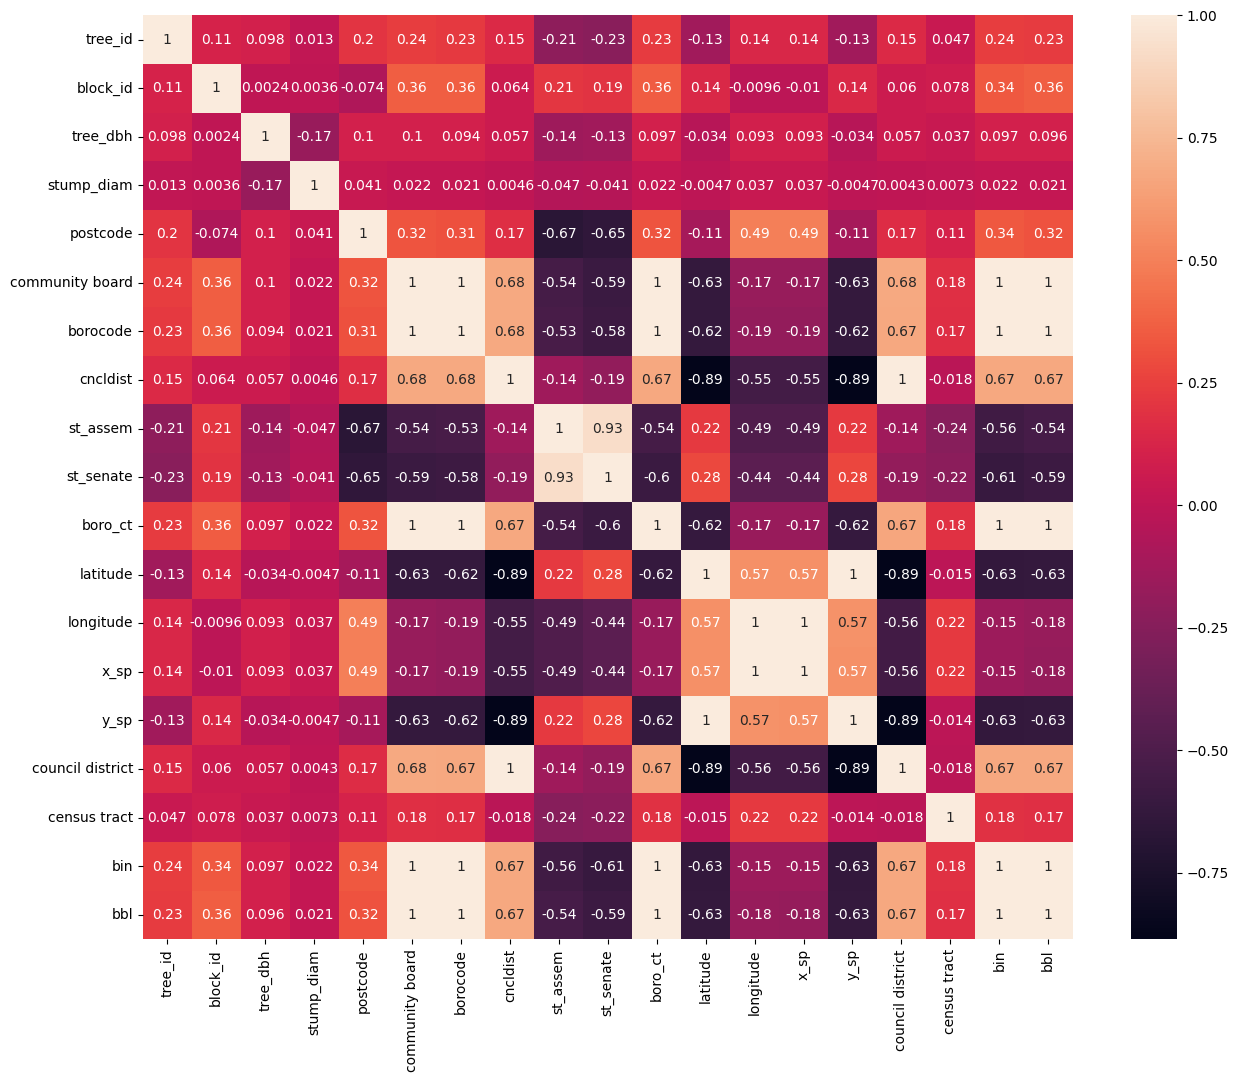

In [7]:
numerical_data = dataset.select_dtypes(include=["float64", "int64"])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### **Географическое представление деревьев из датасета**

In [ ]:
map = folium.Map(
    location=[dataset["latitude"].mean(), dataset["longitude"].mean()],
    zoom_start=10,
)

In [ ]:
for index, row in dataset.dropna(subset=["latitude", "longitude"]).iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]], popup=row["tree_id"]
    ).add_to(map)

In [ ]:
map